# 1 - Perkenalan

Nama : Danu 

Batch : FTDS-016-RMT

Objective : Memprediksi passenger yang Survive atau Not Survive

# 2 - Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 3 - Data Loading

In [ ]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4 - Data Preprocessing

## Get Data for Model Inference

In [ ]:
# Get Data for Model Inference

data_inf = data.sample(5, random_state=28)
data_inf

In [ ]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

## Splitting between `X` and `y`

In [ ]:
# Splitting between `X` and `y`

X = data_train_test.drop('Survived', axis=1)
y = data_train_test['Survived']

In [ ]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (640, 11)
Val Size :  (113, 11)
Test Size :  (133, 11)


## Handling Missing Values

In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

## Feature Selection

In [ ]:
# Display X_train

X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,792,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
189,191,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
567,572,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
500,505,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
868,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
163,165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
522,527,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
566,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


Misalkan column `PassengerId`, `Cabin`, `Ticket`, `Embarked`, dan `Name` tidak memiliki korelasi yang kuat terhadap column `Survived`.

In [ ]:
# Drop Columns

X_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_val.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)

## Get Numerical Columns and Categorical Columns

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Sex']


## Pipeline

In [ ]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(640, 7)

# 5 - Sequential API

## 5.1 - Model Definition

In [ ]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model_sequential = Sequential()
model_sequential.add(Dense(16, activation='relu', input_shape=(7,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


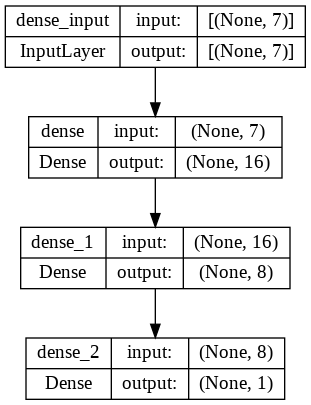

In [ ]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 5.2 - Model Training

In [ ]:
# Train the Model

history_seq = model_sequential.fit(X_train, 
                                   y_train, 
                                   epochs=20, 
                                   validation_data=(X_val, y_val), 
                                   batch_size=10)

Epoch 1/20
64/64 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8547 - val_loss: 0.5023 - val_accuracy: 0.7434
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8578 - val_loss: 0.4968 - val_accuracy: 0.7434
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 0.3805 - accuracy: 0.8562 - val_loss: 0.4976 - val_accuracy: 0.7434
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8578 - val_loss: 0.4902 - val_accuracy: 0.7434
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8562 - val_loss: 0.4931 - val_accuracy: 0.7434
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.8578 - val_loss: 0.4881 - val_accuracy: 0.7434
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8562 - val_loss: 0.4950 - val_accuracy: 0.7434
Epoch 8/20
64/64 [==

## 5.3 - Model Evaluation

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.380593,0.854688,0.502331,0.743363
1,0.379505,0.857813,0.496761,0.743363
2,0.380507,0.856250,0.497605,0.743363
3,0.378593,0.857813,0.490201,0.743363
4,0.378654,0.856250,0.493101,0.743363
5,0.378479,0.857813,0.488126,0.743363
6,0.377990,0.856250,0.494966,0.743363
7,0.378190,0.856250,0.488832,0.752212
8,0.377046,0.856250,0.495313,0.743363
9,0.376977,0.859375,0.501567,0.743363


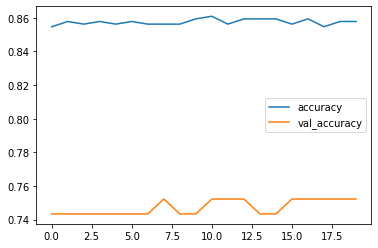

In [ ]:
# Plot between accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

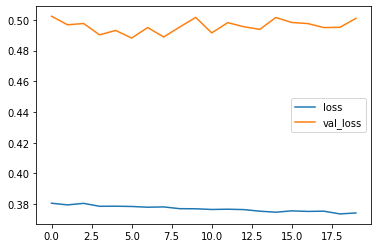

In [ ]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation

from sklearn.metrics import classification_report 

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        84
           1       0.78      0.80      0.79        49

    accuracy                           0.84       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.84      0.84      0.84       133



# 6 - Functional API

## 6.1 - Model Definition

In [ ]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(7,))
hidden1_layer = Dense(16, activation='relu')(input_layer)
hidden2_layer = Dense(8, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

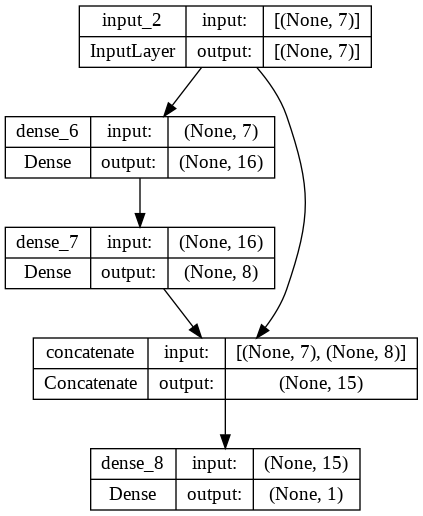

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.2 - Model Training

In [ ]:
# Train the Model

history_func = model_functional.fit(X_train, 
                                   y_train, 
                                   epochs=20, 
                                   validation_data=(X_val, y_val), 
                                   batch_size=10)

## 6.3 - Model Evaluation

In [ ]:
# Create DataFrame

history_functional_df = pd.DataFrame(history_func.history)
history_functional_df

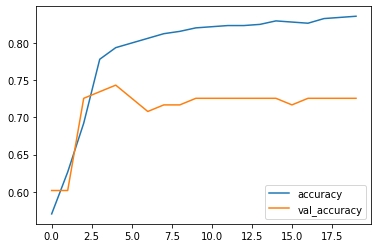

In [ ]:
# Plot between accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

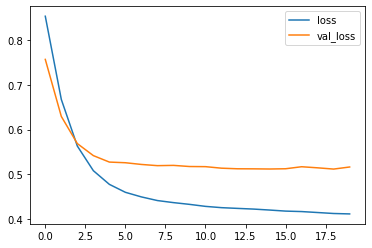

In [ ]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation

from sklearn.metrics import classification_report 

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        84
           1       0.74      0.82      0.78        49

    accuracy                           0.83       133
   macro avg       0.81      0.82      0.82       133
weighted avg       0.83      0.83      0.83       133



# 7 - Model Saving

In [ ]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [ ]:
# Summary of Model Sequential

model_sequential.summary()

In [ ]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

In [ ]:
# Save ANN Model

model_sequential.save('titanic_model.h5')

# 8 - Model Inference

In [ ]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('titanic_model.h5')

In [ ]:
# Transform Inference-Set 

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

array([[ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.4728609 ,
         0.        ,  1.        ],
       [-1.54620871,  0.88962837,  0.44984353, -0.49246397,  0.35585768,
         0.        ,  1.        ],
       [ 0.85858734, -0.59345635, -0.48794103, -0.49246397, -0.47471659,
         0.        ,  1.        ],
       [-1.54620871,  0.51885719, -0.48794103,  0.72443541, -0.06824395,
         0.        ,  1.        ],
       [-1.54620871,  1.5570165 , -0.48794103,  0.72443541,  0.51962175,
         0.        ,  1.        ]])

In [ ]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 54ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])